In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore', 'The parameter \'pretrained\' is deprecated')
warnings.filterwarnings('ignore', 'Arguments other than a weight enum or `None` for \'weights\' are deprecated')

def is_colab():
    for key in os.environ.keys():
        if "COLAB" in key:
            return True
    return False

if is_colab():
  !git clone https://github.com/SoulMind01/FewShot-demo.git
  # Get the current working directory
  current_working_directory = os.getcwd()
  # Add the "my_folder" folder to the import path
  sys.path.append(current_working_directory + "/FewShot-demo")
  from google.colab import drive
  drive.mount('/content/drive')
  json_path = 'FewShot-demo/config.json'
else:
  json_path = 'config.json'

import functions
from functions import do_experiment
from arguments import ARGUMENTS, init_args, reset_args
import matplotlib.pyplot as plt
import numpy as np
from train import train
import importlib

def reload_func():
  importlib.reload(functions)

## Define arguments

In [3]:
args = init_args()

## Do experiments together

Running experiment:   0%|          | 0/7 [00:00<?, ?it/s]

Results loaded from file
c:\Users\11709\Desktop\PROJECTS\FewShot-demo\closest_dist_results


Running experiment:  14%|█▍        | 1/7 [00:06<00:39,  6.61s/it]

dataset: cifar10, normal_class: 0, epochs: 10, auc: 0.6459, f1: 0.9142, spec: 0.3958, recall: 0.8960, acc: 0.8480


c:\Users\11709\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\11709\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


dataset: cifar10, normal_class: 1, epochs: 10, auc: 0.0000, f1: 0.0000, spec: 1.0000, recall: 0.0000, acc: 1.0000
dataset: cifar10, normal_class: 2, epochs: 10, auc: 0.4873, f1: 0.8760, spec: 0.1132, recall: 0.8613, acc: 0.7820


Running experiment:  14%|█▍        | 1/7 [02:15<13:30, 135.13s/it]


KeyboardInterrupt: 

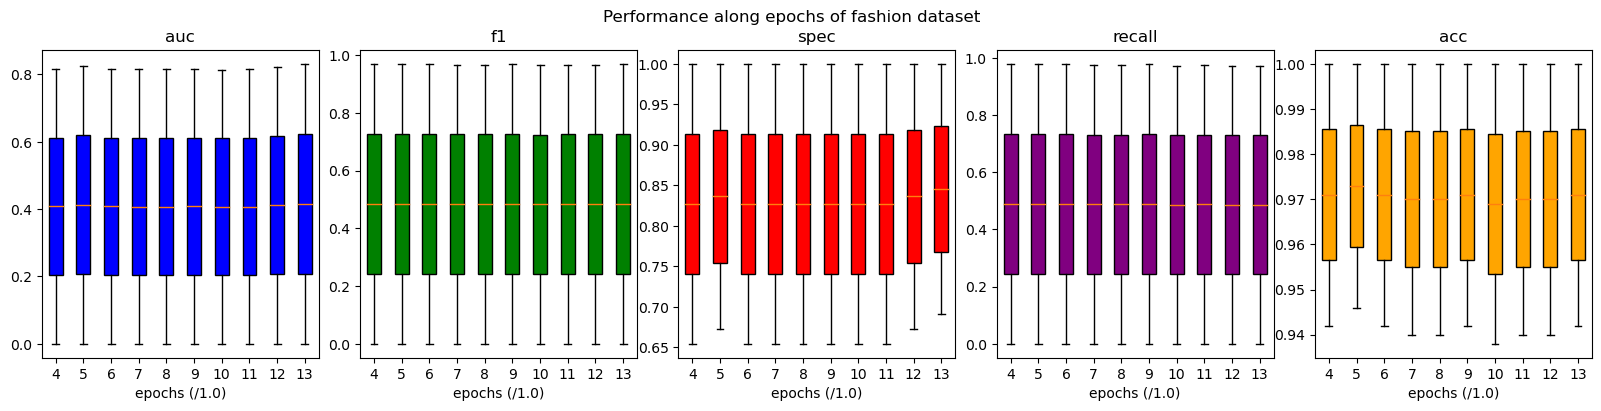

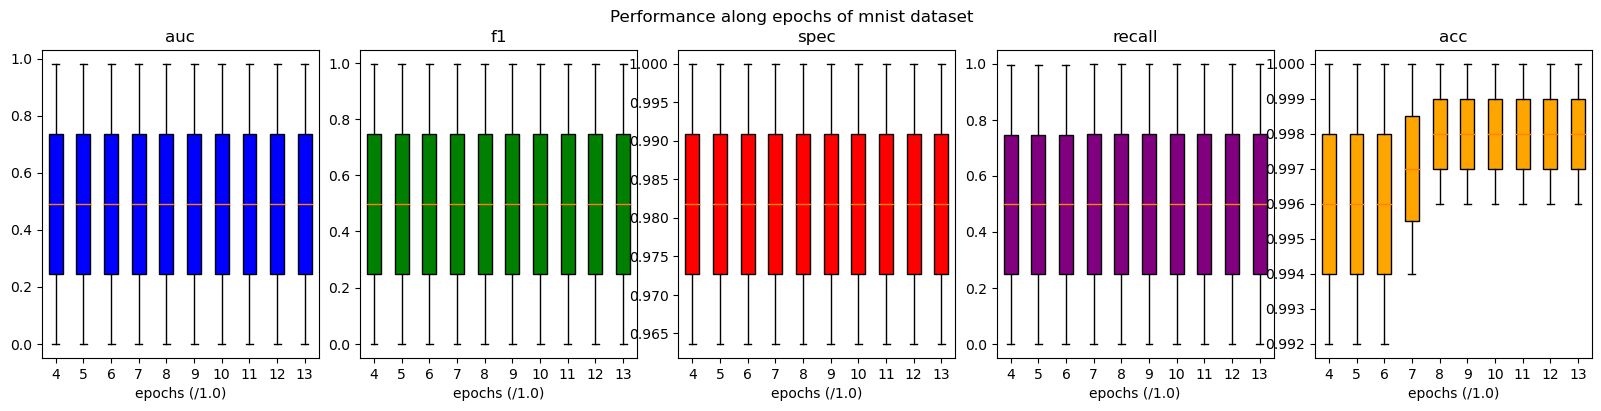

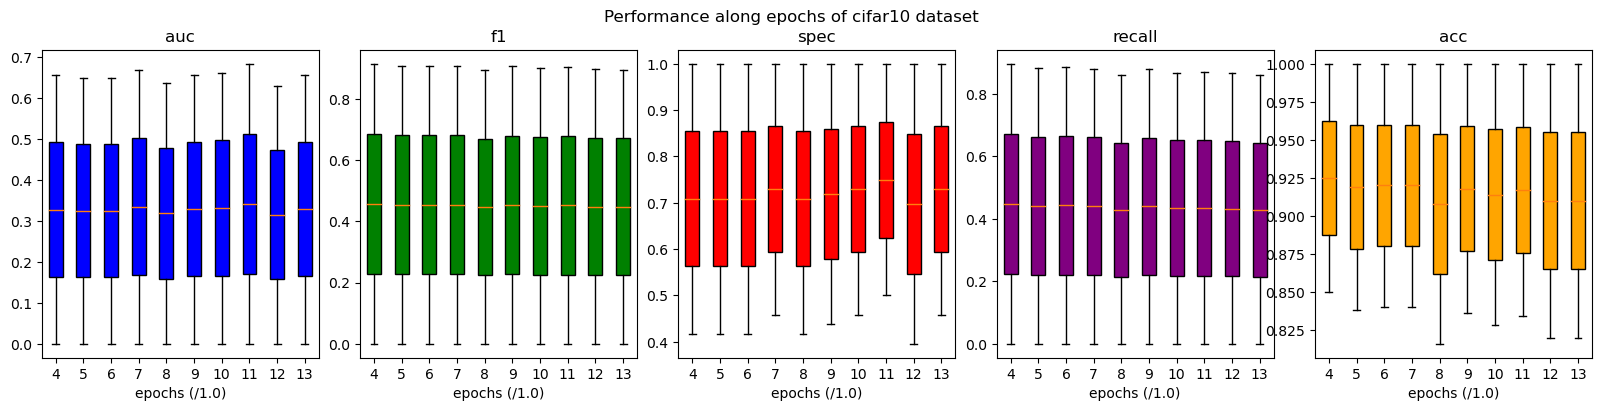

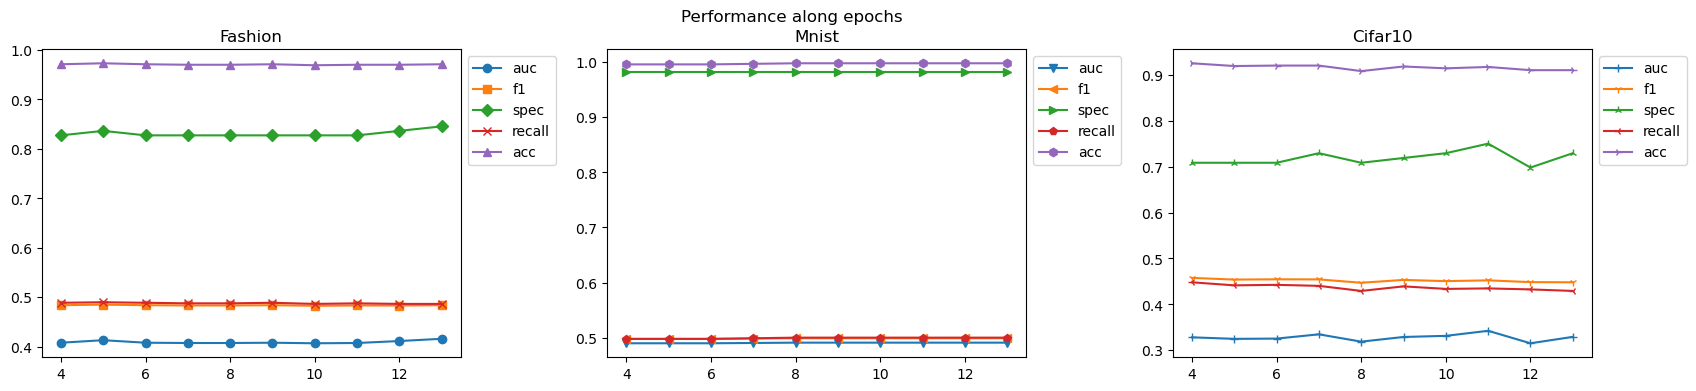

In [2]:
import json
from tqdm import tqdm
num_test_data = 500
class_range = np.arange(0, 10, 1)
test_experiment = False
args = init_args()
args.evaluation_method = 'closest_dist'

with open(json_path, 'r') as f:
  config = json.load(f)
conf_features = config['features']
conf_feature_ranges = config['feature_ranges']
conf_specify_xticks = config['specify_xticks']


for feature in tqdm(conf_features, desc=f'Running experiment together with {args.evaluation_method} method'):
  args = reset_args(args)
  experiment_name = f'{feature}_experiment'
  feature_name = feature
  feature_range = np.arange(
    conf_feature_ranges[feature][0],
    conf_feature_ranges[feature][1],
    conf_feature_ranges[feature][2]
  )
  specify_xticks = np.arange(
    conf_specify_xticks[feature][0],
    conf_specify_xticks[feature][1],
    conf_specify_xticks[feature][2]
  ) if feature in conf_specify_xticks else None
  do_experiment(
    args=args,
    experiment_name=experiment_name,
    feature_name=feature_name,
    feature_range=feature_range,
    num_test_data=num_test_data,
    class_range=class_range,
    test_experiment=test_experiment,
    specify_xticks=specify_xticks
  )

## Do light experiment

In [ ]:
args = init_args()
train(args, 100)

In [13]:
results = functions.load_results('closest_dist_results\epochs_experiment_closest_dist')[0]

In [14]:
results['cifar10']['f1']

{4: [0.9152542372881357, 0.0],
 5: [0.9078498293515359, 0.0],
 6: [0.9090909090909091, 0.0],
 7: [0.908675799086758, 0.0],
 8: [0.8940092165898617, 0.0],
 9: [0.906392694063927, 0.0],
 10: [0.9011494252873564, 0.0],
 11: [0.9044879171461451, 0.0],
 12: [0.896788990825688, 0.0],
 13: [0.8960739030023095, 0.0]}

In [8]:
args = init_args()
args.epochs = 4
class_range = np.arange(0, 10, 1)
for class_ in class_range:
  args.normal_class = class_
  train(args, 100)

auc: 0.8709, f1: 0.9451, spec: 0.5000, recall: 0.9348, acc: 0.9000
auc: 0.9965, f1: 0.9831, spec: 0.7692, recall: 1.0000, acc: 0.9700
auc: 0.8879, f1: 0.9091, spec: 0.2857, recall: 0.9302, acc: 0.8400
auc: 0.8095, f1: 0.9282, spec: 0.3333, recall: 0.9231, acc: 0.8700
auc: 0.7678, f1: 0.9222, spec: 0.3000, recall: 0.9222, acc: 0.8600
auc: 0.9560, f1: 0.9613, spec: 0.6667, recall: 0.9560, acc: 0.9300
auc: 0.8845, f1: 0.9341, spec: 0.3750, recall: 0.9239, acc: 0.8800
auc: 0.9704, f1: 0.9721, spec: 0.7273, recall: 0.9775, acc: 0.9500
auc: 0.9991, f1: 0.0000, spec: 1.0000, recall: 0.0000, acc: 0.1200
auc: 0.9840, f1: 0.9674, spec: 0.8333, recall: 0.9468, acc: 0.9400


## Do experiment along class

In [ ]:
# do_experiment(
#     args=args,
#     experiment_name='class_experiment',
#     feature_name='class',
#     feature_range=np.arange(0, 1, 1), # class experiment do test any feature
#     num_test_data=500,
#     class_range=np.arange(0, 2, 1),
#     test_experiment=True,
#     lock_feature=True, # class experiment do test any feature
#     boxplot=False,
# )

## Do experiment along epochs

In [ ]:
epochs_range = np.arange(4, 14, 1)
do_experiment(
    args=args,
    experiment_name='epochs_experiment',
    feature_name='epochs',
    feature_range=epochs_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
)

## Do experiment along alpha

In [ ]:
args = init_args()
args.evaluation_method = 'closest_dist'

In [ ]:
alpha_range = np.arange(0, 1.1, 0.1)
do_experiment(
    args=args,
    experiment_name='alpha_experiment',
    feature_name='alpha',
    feature_range=alpha_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    test_experiment=False,
    specify_xticks=np.arange(0, 11, 1),
)

## Do experiment along contamination

In [ ]:
contamination_range = np.arange(0, 0.5, 0.05)
do_experiment(
    args=args,
    experiment_name='contamination_experiment',
    feature_name='contamination',
    feature_range=contamination_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    quick_run=False,
    test_experiment=True,
    specify_xticks=np.arange(0, 10, 1),
)

## Do experiment along train dataset size

In [ ]:
args = init_args()

In [ ]:
N_range = np.arange(10, 40, 3)
do_experiment(
    args=args,
    experiment_name='N_experiment',
    feature_name='num_ref',
    feature_range=N_range,
    num_test_data=500,
    class_range=np.arange(0, 1, 1),
)

## Do experiment along train reference dataset size

In [ ]:
k_range = np.arange(1, 10, 1)
do_experiment(
    args=args,
    experiment_name='k_experiment',
    feature_name='k',
    feature_range=k_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    quick_run=False,
    test_experiment=False
)

## Do experiment along test reference dataset size

In [ ]:
num_ref_eval_range = np.arange(2, 11, 1)
do_experiment(
    args=args,
    experiment_name='num_ref_eval_experiment',
    feature_name='num_ref_eval',
    feature_range=num_ref_eval_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
)

## Do experiment along weight decay

In [ ]:
# weight_decay_range = np.arange(0, 1, 0.1)
# do_experiment(
#     args=args,
#     experiment_name='weight_decay_experiment',
#     feature_name='weight_decay',
#     feature_range=weight_decay_range,
#     num_test_data=500,
#     class_range=np.arange(0, 10, 1),
#     test_experiment=False,
#     boxplot=False,
# )

## Do experiment along learning rate

In [ ]:
learning_rate_range = np.array([1e-7, 3*1e-7, 1e-6, 3*1e-6, 1e-5, 3*1e-5, 1e-4, 3*1e-4, 1e-3])
do_experiment(
    args=args,
    experiment_name='learning_rate_experiment',
    feature_name='learning rate',
    feature_range=learning_rate_range,
    num_test_data=500,
    class_range=np.array(args.normal_class),
    quick_run=False,
    test_experiment=False,
    specify_xticks=np.arange(0, 9, 1),
)

## Do experiment along vector size

In [9]:
args = init_args()
args.evaluation_method = 'closest_dist'
args.vector_size

1024

Results loaded from file
c:\Users\11709\Desktop\PROJECTS\FewShot-demo\closest_dist_results


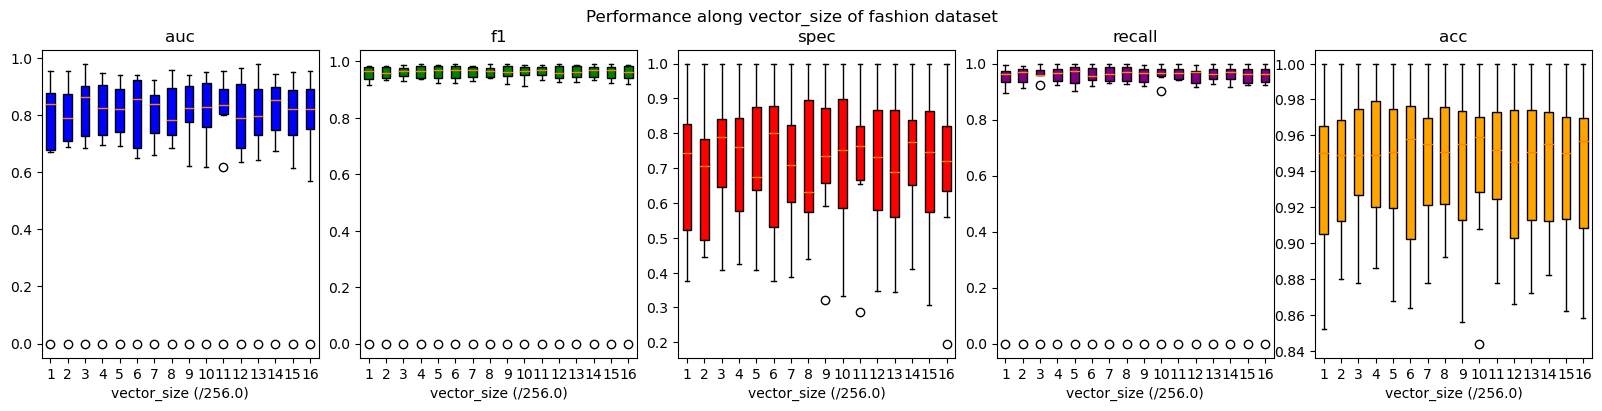

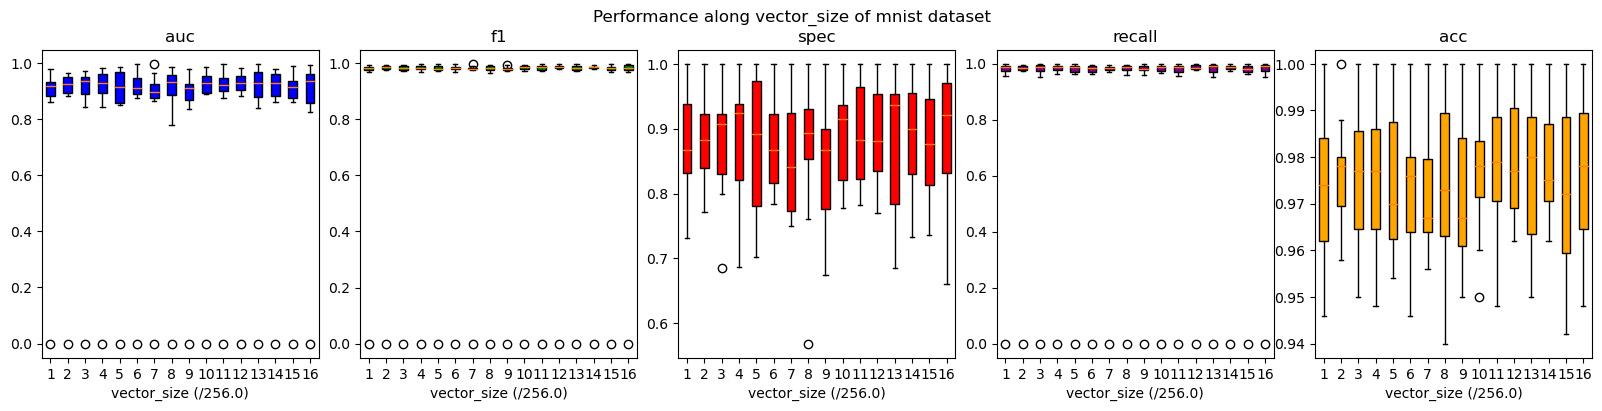

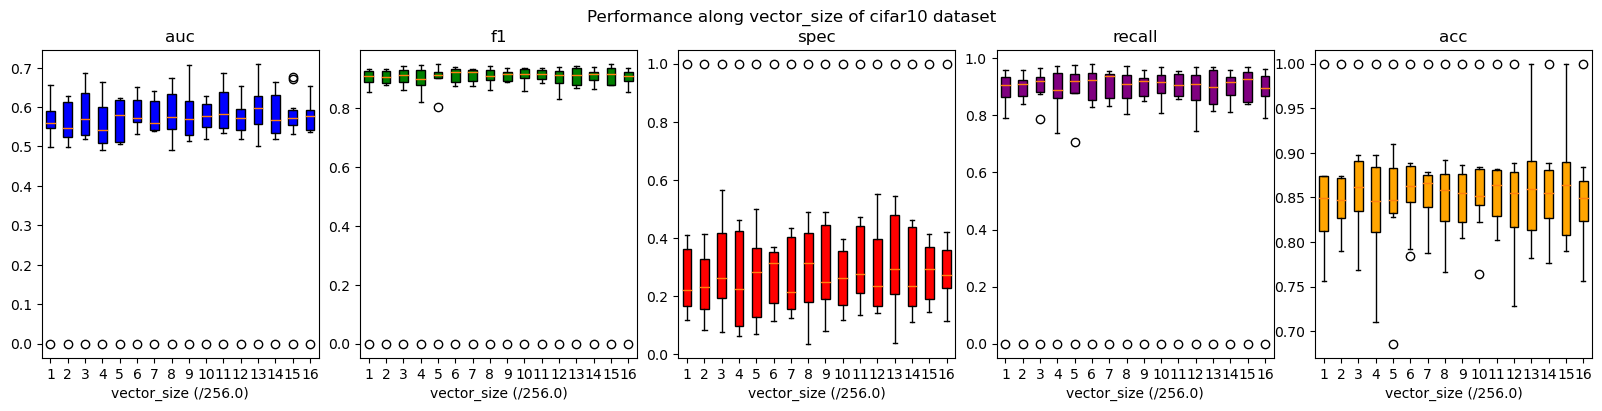

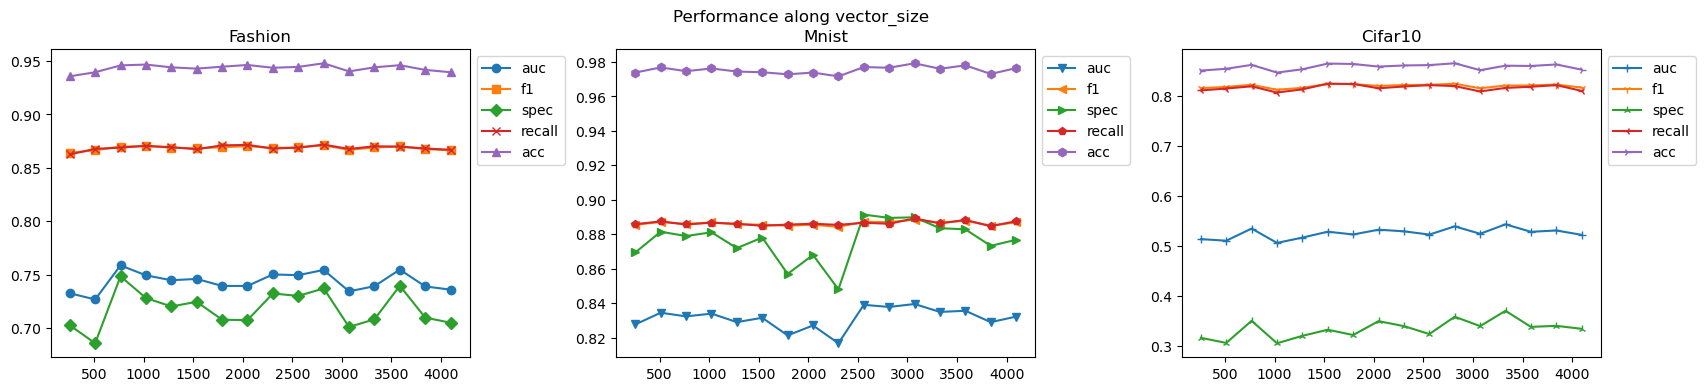

In [8]:
vector_size_range = np.arange(256, 4097, 256)
do_experiment(
    args=args,
    experiment_name='vector_size_experiment',
    feature_name='vector_size',
    feature_range=vector_size_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    specify_xticks=np.arange(1, len(vector_size_range)+1, 1),
)

# Comparative experiments

## Compare each distance methods

In [ ]:
args = init_args()
feature_name = 'distance_method'
feature_range = ['multi', 'L1', 'L2', 'L3', 'L4', 'inf']


experiment_name = f'{feature_name}_experiment'
do_experiment(
    args=args,
    experiment_name=experiment_name,
    feature_name=feature_name,
    feature_range=feature_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    compare_stats=['auc', 'f1'],
)

## Compare each activation function

In [ ]:
args = init_args()
feature_name = 'activation_function'
feature_range = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu', 'selu', 'swish', 'mish', 'gelu', 'softplus', 'softsign', 'hard_sigmoid']


experiment_name = f'{feature_name}_experiment'
do_experiment(
    args=args,
    experiment_name=experiment_name,
    feature_name=feature_name,
    feature_range=feature_range,
    num_test_data=500,
    class_range=np.arange(0, 10, 1),
    compare_stats=['auc', 'f1'],
)

## FewSOME

In [46]:
import pandas as pd

In [120]:
results_anomaly_score_origin = functions.load_results('anomaly_score_results/epochs_experiment')[0]
results_closest_dist_origin = functions.load_results('closest_dist_results/epochs_experiment_closest_dist')[0]

In [99]:
read_path = 'fewsome_outputs'
dataset = 'fashion'
epochs_range = np.arange(0, 10, 1)

# construct df result
results_fewsome = {'fashion': {}}
for stat in ['auc', 'f1', 'spec', 'recall', 'acc']:
  results_fewsome[dataset][stat] = np.zeros(len(epochs_range))
  for epoch in epochs_range:
    sum = 0
    for class_ in np.arange(0, 10, 1):
      sum += pd.read_csv(f'{read_path}/class_{class_}.csv')[stat][epoch]
    sum /= 10
    results_fewsome[dataset][stat][epoch] = sum

In [121]:
results_anomaly_score = {'fashion': {}}
results_closest_dist = {'fashion': {}}
for stat in ['auc', 'f1', 'spec', 'recall', 'acc']:
  results_anomaly_score[dataset][stat] = np.zeros(len(epochs_range))
  results_closest_dist[dataset][stat] = np.zeros(len(epochs_range))
  for key, value in results_anomaly_score_origin[dataset][stat].items():
    results_anomaly_score[dataset][stat][int(key)-4] = np.mean(np.array(value))
  for key, value in results_closest_dist_origin[dataset][stat].items():
    results_closest_dist[dataset][stat][int(key)-4] = np.mean(np.array(value))

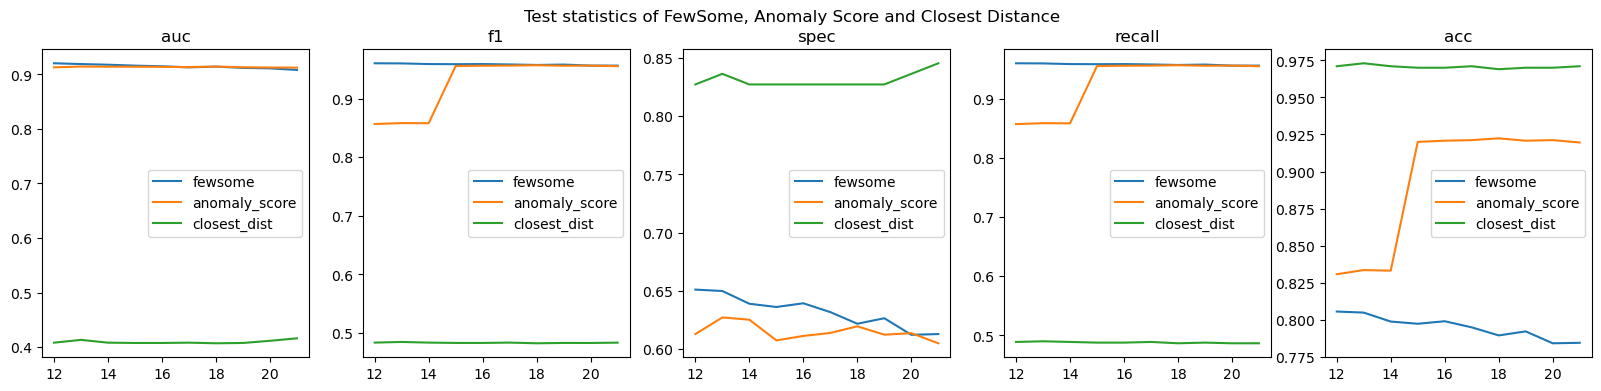

In [125]:
epochs_range += 4
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, stat in enumerate(['auc', 'f1', 'spec', 'recall', 'acc']):
  axs[i].plot(epochs_range, results_fewsome[dataset][stat], label='fewsome')
  axs[i].plot(epochs_range, results_anomaly_score[dataset][stat], label='anomaly_score')
  axs[i].plot(epochs_range, results_closest_dist[dataset][stat], label='closest_dist')
  axs[i].set_title(stat)
  axs[i].legend()
plt.suptitle('Test statistics of FewSome, Anomaly Score and Closest Distance')
plt.show()